Алиева Хадижат ПИ20-1. Лабораторная работа 1.1. Парная линейная регрессия

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Загрузить данные о котировках нескольких инструментов с сайта РТС (следите за тем, чтобы периоды выгрузки совпадали, иначе весь наш анализ не будет иметь смысла).

In [ ]:
mvid = pd.read_csv("MVID_101001_171001.txt")
sber = pd.read_csv("SBER_101001_171001.txt")
data = mvid.merge(sber, on="<DATE>")
Y_mvid = data["<CLOSE>_x"]
Y_sber = data["<CLOSE>_y"]
X_mvid = mvid.drop("<CLOSE>", axis=1)
X_sber = sber.drop("<CLOSE>", axis=1)
X_mvid.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<VOL>
0,MVID,D,20101001,0,19406
1,MVID,D,20101004,0,31039
2,MVID,D,20101005,0,17651
3,MVID,D,20101006,0,36482
4,MVID,D,20101007,0,204248


In [ ]:
X_sber.head()

,<TICKER>,<PER>,<DATE>,<TIME>,<VOL>
0,SBER,D,20101001,0,332429890
1,SBER,D,20101004,0,194032721
2,SBER,D,20101005,0,198775753
3,SBER,D,20101006,0,210406027
4,SBER,D,20101007,0,145137617


2. Построить модель парной линейной регрессии с использованием метода градиентного спуска.

In [ ]:
class MyRegression:
    
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0

    def predict(self, x):
        """Метод для предсказания результата по фактору"""
        return self.b0 + self.b1 * x

    def error(self, X, Y):  
        """Функция ошибки"""
        return sum((self.predict(X) - Y)**2) / (2 * len(X)) 
        
    def BGD_new(self, X, Y, alpha=0.000005, accuracy=0.01, max_steps = 5000):
        """Метод градиентного спуска"""
        steps, errors = [], []
        dJ = 1
        step = 0
        
        #Ошибки
        old_err = self.error(X, Y)
        new_err = self.error(X, Y) - 1
        
        #Специальные ограничения, чтоб вечно не обучалось
        while dJ > accuracy and (step < max_steps):
            
            dJ0 = sum(self.predict(X)-Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            
            #Новая ошибка становится старой
            old_err = new_err
            new_err = self.error(X, Y)
            
            # Обновляем dj, как флаг выхода из цикла
            dJ = abs(old_err - new_err)
            
            step += 1
            steps.append(step)
            errors.append(new_err)
            
        return steps, errors

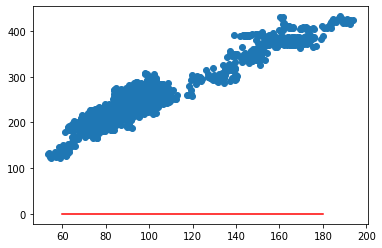

0       222.132656
1       224.102184
2       229.312709
3       227.393042
4       225.398583
           ...    
1753    480.041161
1754    482.933126
1755    478.595178
1756    479.517615
1757    481.187975
Name: <CLOSE>_y, Length: 1758, dtype: float64

In [ ]:
model = MyRegression()
X0 = np.linspace(60, 180, 100)
Y0 = model.predict(X0)
plt.figure()
plt.scatter(Y_sber, Y_mvid)
plt.plot(X0, Y0, 'r')
plt.show()
steps, errors = model.BGD_new(Y_sber, Y_mvid)
model.predict(Y_sber)

3. Оценить на графике качество построенной модели.

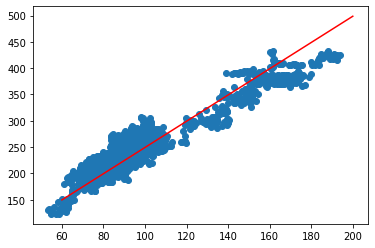

In [ ]:
X0 = np.linspace(60, 200, 100)
Y0 = model.predict(X0)

plt.figure()
plt.scatter(Y_sber, Y_mvid)
plt.plot(X0, Y0, "r")
plt.show()

In [ ]:
print(f"{model.error(Y_sber, Y_mvid)}")

298.76881676471504


4. Построить кривые обучения.

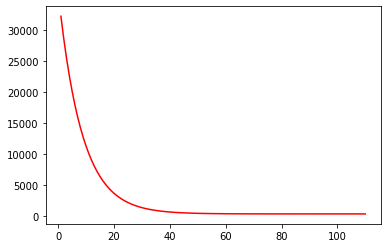

In [ ]:
plt.figure()
plt.plot(steps, errors, "r")
plt.show()